In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
filepath = "women fashion"

In [3]:
extracted_files = os.listdir(filepath)

In [4]:
print(extracted_files[1])

Anarkali suit with a modern twist.jpg


In [5]:
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

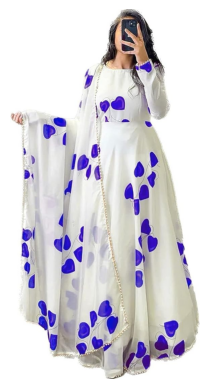

In [6]:
sample_first_image = os.path.join(filepath, extracted_files[1])
display_image(sample_first_image)

In [7]:
import glob

# directory path containing your images
image_directory = 'women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [9]:
basemodel = VGG16(weights = 'imagenet', include_top = False)
modell = Model(inputs = basemodel.input, outputs = basemodel.output)

In [10]:
def preprocess(img_path):
    img = image.load_img(img_path, target_size=(244,244))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array,axis=0)
    return img_array_exp

In [11]:
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

In [12]:
all_features = []
all_image_names = []

In [13]:
for img_path in image_paths_list:
    preprocessed_img = preprocess(img_path)
    features = extract_features(modell, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
print(all_image_names)

['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'Anarkali suit with a modern twist.jpg', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'black and white gingham checkered A-line dress with a flared skirt.jpg', 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg', 'black dress with lace detailing.jpg', 'black dress with sparkling details.jpg', 'blac

In [15]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, modell, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess(input_image_path)
    input_features = extract_features(modell, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != image_paths_list.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = image_paths_list[idx]

        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


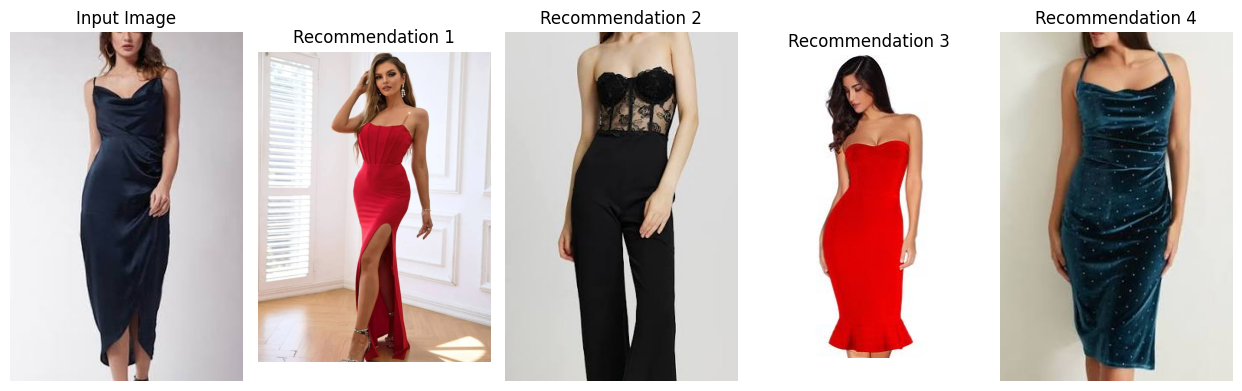

In [16]:
input_image_path = 'women fashion\\dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, modell, top_n=5)

In [18]:
gitclone https://github.com/mgtron278/Recommendation_system.git


SyntaxError: invalid syntax (4150833530.py, line 1)

In [19]:
!git clone https://github.com/mgtron278/Recommendation_system.git

Cloning into 'Recommendation_system'...
